In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Models from Scikit-Learn

from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

In [2]:
insurance = pd.read_csv("C:\\Users\Ope\\Documents\\CSV\\insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

In [6]:
data_cat = ["sex", 'smoker', 'region', 'children']

numerical_column = ['bmi', 'age'] # Charges isn't here b'cos it is our target

### Analysing categorical variable

In [7]:
# Count the number of each category in data_cat
for col in data_cat:
    print(f'Count of Each Class in {col} \n' + '-'*20)
    print(insurance[col].value_counts())
    print(' '*20)
    print('*'*20);

Count of Each Class in sex 
--------------------
male      676
female    662
Name: sex, dtype: int64
                    
********************
Count of Each Class in smoker 
--------------------
no     1064
yes     274
Name: smoker, dtype: int64
                    
********************
Count of Each Class in region 
--------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
                    
********************
Count of Each Class in children 
--------------------
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
                    
********************


In [8]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

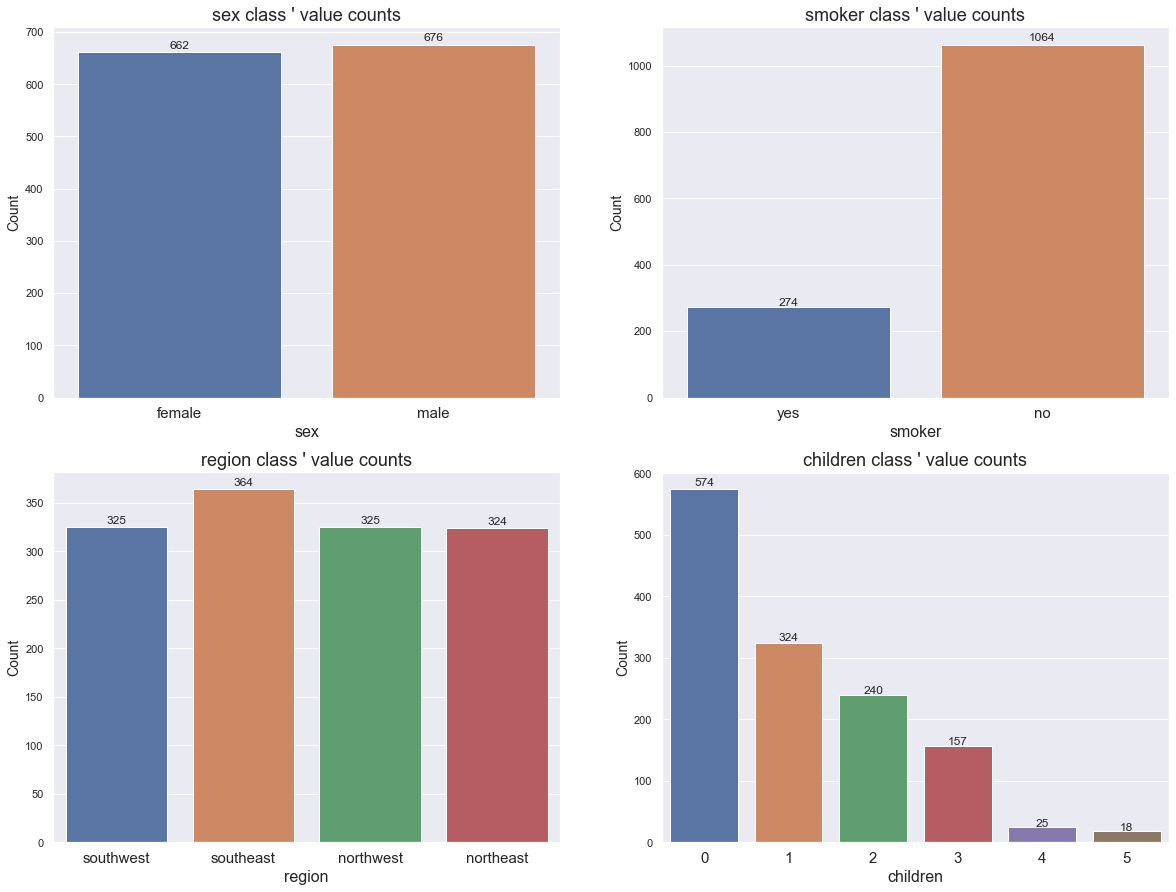

In [9]:
# Visualize value counts for each category in data_cat

plt.figure(figsize=(20, 15))
for i, col in enumerate(data_cat):
    plt.subplot(2, 2, i + 1)
    sns.set_theme(style='darkgrid')

    ax = sns.countplot(x=col, data=insurance)

    plt.title(f'{col} class \' value counts', size=18)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.xticks(size=15)
    plt.xlabel(col, fontsize=16)

    # show exact values on bars
    show_values(ax);

#### Checking smokers and non-smoker per column. 

In [10]:
def display_catplots(var, title):
    for col in data_cat:
        sns.catplot(data=insurance, x=var, kind="count", hue=col,
                    height=3, aspect=2)
        plt.title(f"Count of {title} by  {col}", fontsize=15);

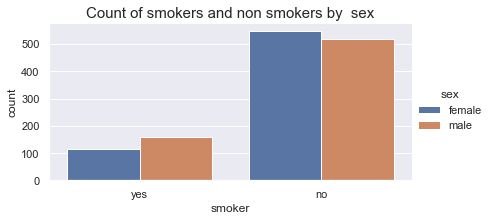

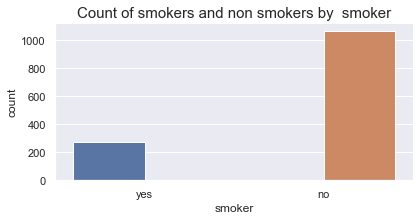

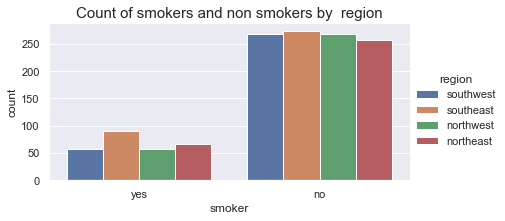

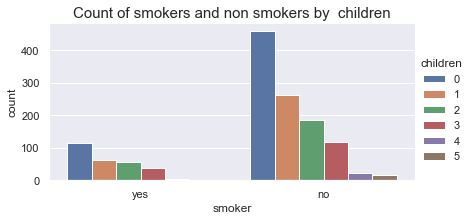

In [11]:
# Categorical plots for smokers/non smokers
display_catplots(var="smoker", title="smokers and non smokers")


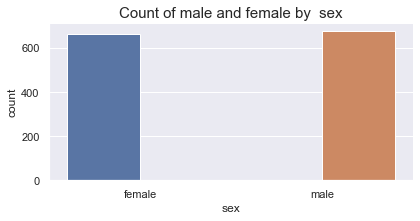

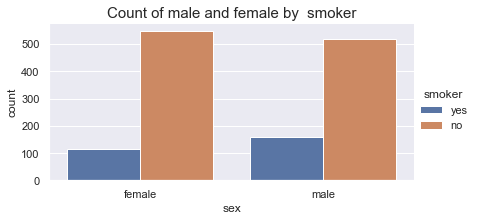

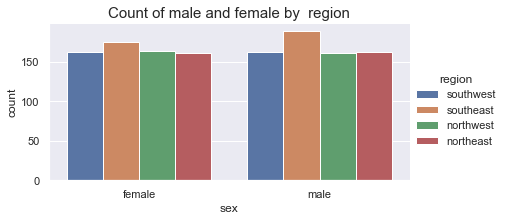

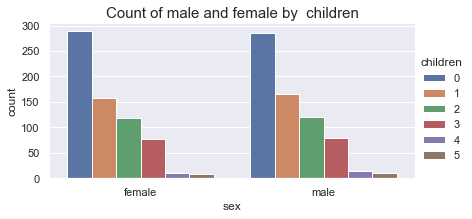

In [12]:
# Categorical plots for  male and females in each column

display_catplots(var="sex", title="male and female")

## Analysing the numerical or quantitative variables

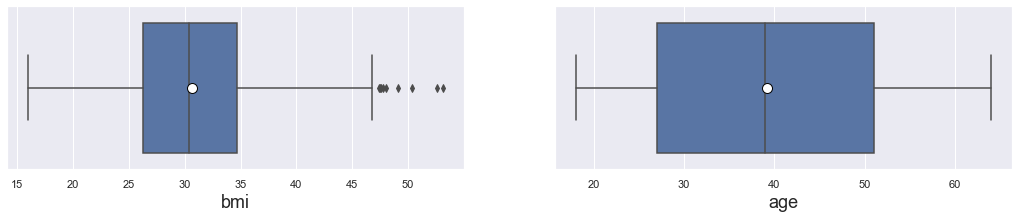

In [13]:
# draw boxplots for each quantitative column
plt.figure(figsize=(18, 3))
for i, col in enumerate(numerical_column):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=insurance, x=col,
                showmeans=True, # Display the mean on the boxplot
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
    plt.xlabel(col, fontsize=18)

* Bmi shows outliers which we will deal with later

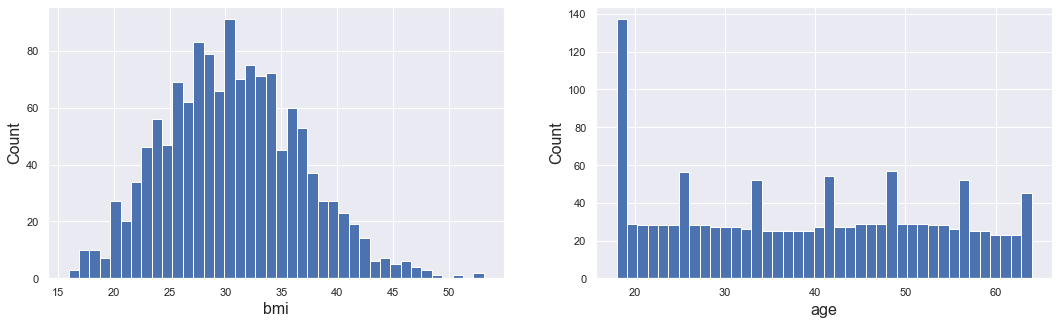

In [14]:
# draw distribution plots for each quantitative column
plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_column):
    plt.subplot(1, 2, i+1)
    plt.hist(insurance[col], bins=40)
    plt.xlabel(col, fontsize=16)
    plt.ylabel("Count", fontsize=16)

#### Our bmi variable is  a bit right skewed i.e it has outliers

## Exploring our target variable.

In [15]:
# Function to display distribution of variable by col (from the data_cat list)

def display_distributions(var):
    for col in data_cat:
        sns.displot(data=insurance, x=var, hue=col,
                    height=4, aspect=2, kind='kde')

        plt.title(f'Distribution of {var} by {col}', size=18)
        plt.xlabel(var, size=14)
        plt.ylabel('Count', size=14)
        plt.xticks(size=15)
        plt.show()

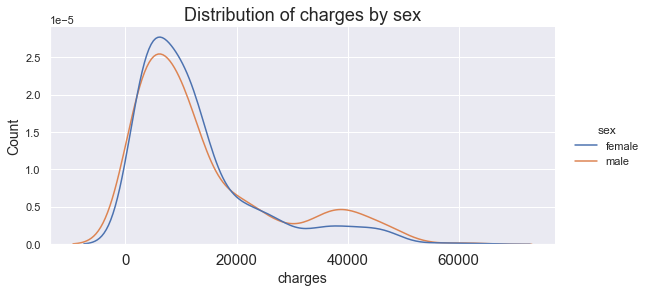

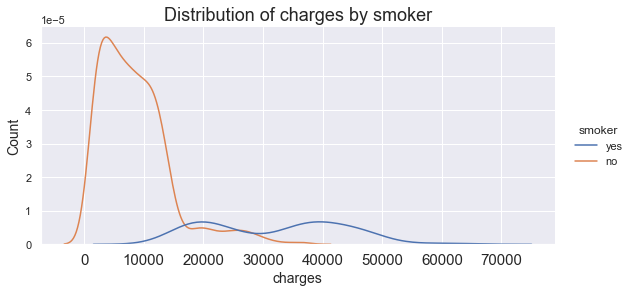

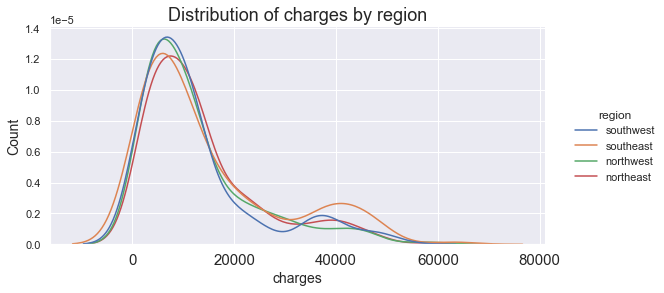

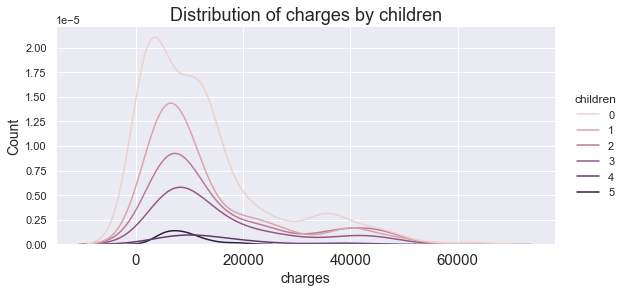

In [16]:
# Distribution Target (charges) / categorical features
display_distributions(var="charges")


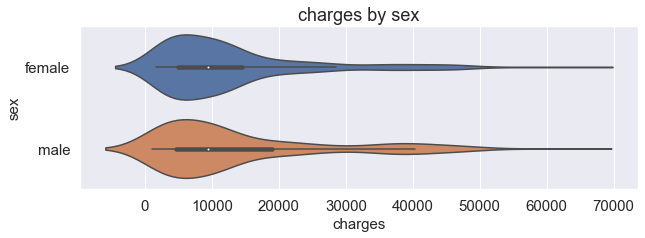

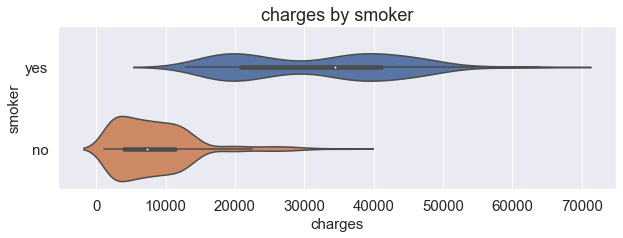

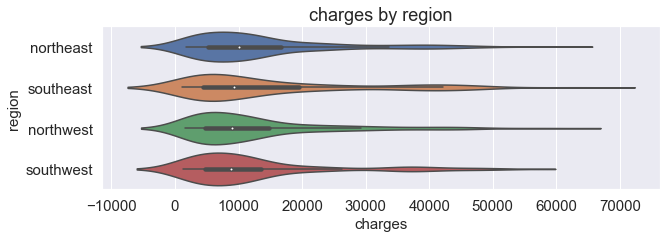

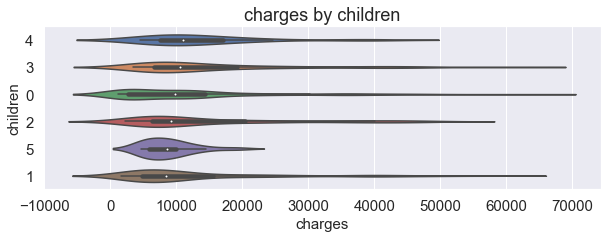

In [17]:
# Violin plot charges by categorical features
for col in data_cat:
    order = insurance.groupby(col)['charges'].median().sort_values(ascending=False).index

    plt.figure(figsize=(10,3))
    sns.violinplot(x="charges", y=col,
                   orient='h',
                   order=order,
                   data=insurance)

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("charges", size=15)
    plt.ylabel(f"{col}", size=15)

    plt.title(f"charges by {col}", fontsize=18);


# From plots above it can be deduce:
* That smokers are charged more for there medical insurance.
* That people from southeast region pay more for their medical insurance than their counterparts.
* Gender doesn't influence the insurance charges.

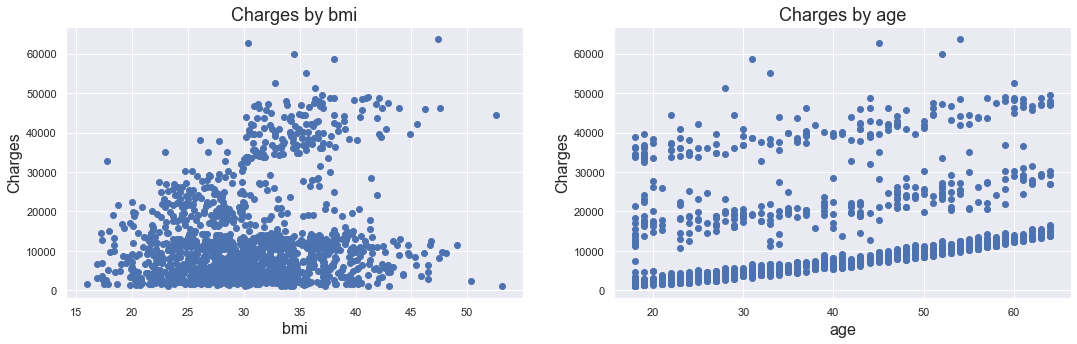

In [18]:
# Target against numerical variable feature

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_column):
    plt.subplot(1, 2, i+1)
    plt.scatter(insurance[col], insurance['charges'])
    plt.xlabel(col, fontsize=16)
    plt.ylabel("Charges", fontsize=16)
    plt.title(f"Charges by {col}", fontsize=18)

In [19]:
# Function to display lmplot of charges with different hue

def display_lmplot(hue):
    for col in numerical_column:
        sns.lmplot(data=insurance,
                   x=col, y="charges", hue=hue,
                   height=4, aspect=2)
        plt.xlabel(col, fontsize=16)
        plt.ylabel("Charges", fontsize=16)
        plt.title(f"Charges by {col}", fontsize=18)
        

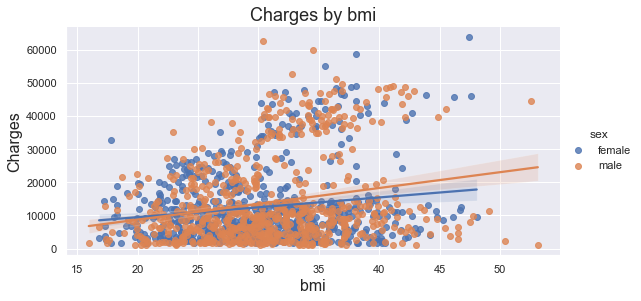

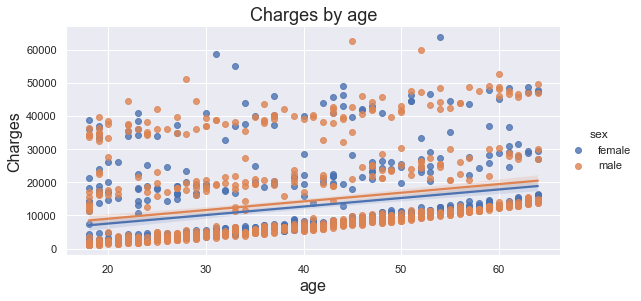

In [20]:
display_lmplot('sex')

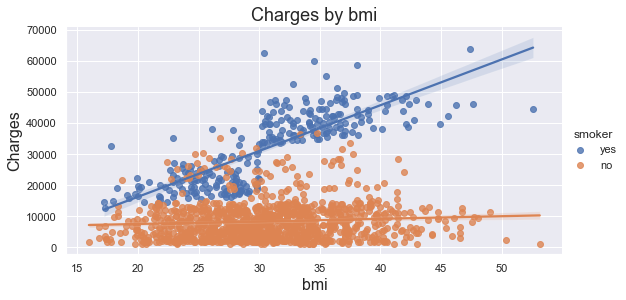

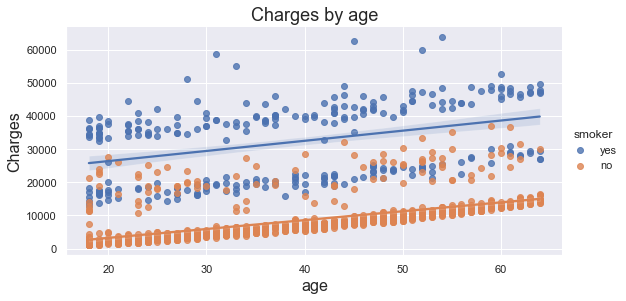

In [21]:
display_lmplot('smoker')

* The above chart shows that people with bmi> than 30 pay more for their insurace than those with lower bmi.
* Most people with high bmi are also smokers

In [22]:
def display_boxplots(var):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(data_cat):
        plt.subplot(2, 2, i + 1)
        order = insurance.groupby(col)[var].median().sort_values(ascending=False).index
    
        sns.boxplot(x=var, y=col, 
                    showfliers=True,
                    orient='h',
                    order=order,
                    data=insurance,
                    showmeans=True, # permet d'afficher la moyenne sur le boxplot
                    meanprops={"marker":"o",
                               "markerfacecolor":"white", 
                               "markeredgecolor":"black",
                               "markersize":"10"})

        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.xlabel(" ", size=15)
        plt.ylabel(f"{col}", size=15)

        plt.title(f"{var} by {col}", fontsize=18);

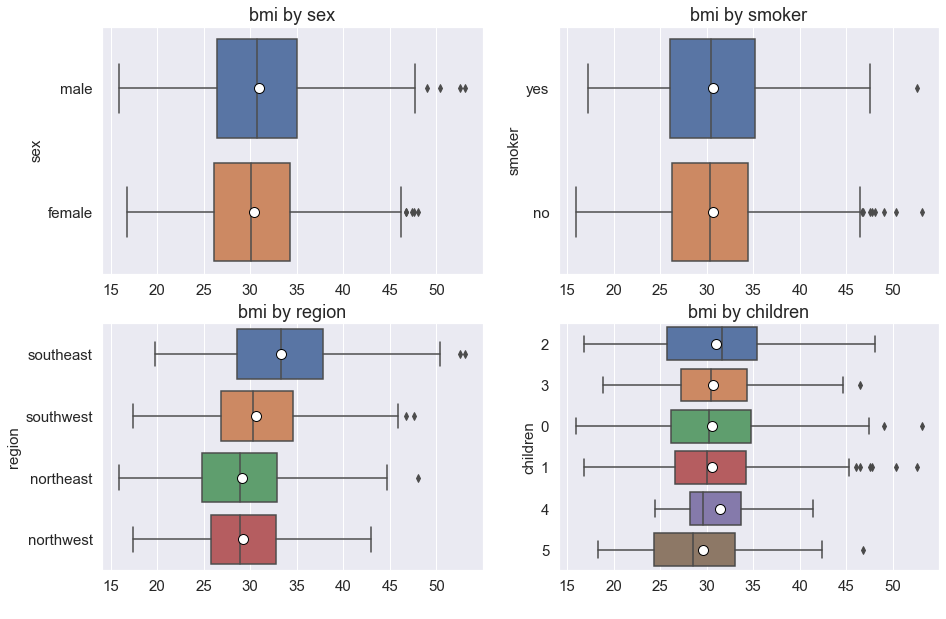

In [23]:
# Relationship between bmi and the data_cat
display_boxplots(var="bmi")

* People with 0 to 3 children have higher bmi compare to those with 3 to 5

* People from southeast have higher bmi compare to their counterpart

# DATA PREPROCESSING

In [24]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
insurance_copy = insurance.copy()

In [26]:
##Converting objects labels into categorical
insurance[['sex', 'smoker', 'region']] = insurance[['sex', 'smoker', 'region']].astype('category')
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [27]:

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.transform(insurance.sex)

label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.transform(insurance.smoker)

label.fit(insurance.region.drop_duplicates())
insurance.region = label.transform(insurance.region)

insurance.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [28]:
inputs = insurance.drop("charges", axis=1)
target = insurance.charges
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_insurance = scaler.fit_transform(inputs)

In [30]:

train_df, test_df = train_test_split(scaled_insurance, test_size=.2, random_state=42)
train_label, test_label = train_test_split(target, test_size=.2, random_state=42)

In [31]:
len(train_df), len(test_df), len(train_label), len(test_label)

(1070, 268, 1070, 268)

In [32]:
#put the models in a dictionary.

models = {'RF': RandomForestRegressor(),
         'DT': DecisionTreeRegressor(max_depth=3),
         'SGD': SGDRegressor(),
         "XGB": XGBRegressor(),
         'GB': GradientBoostingRegressor()}

# Create a function to fit and score model
def fit_and_score(models, X_train_normal, X_test_normal, y_train, y_test):
    """
    Fits and evaluates given machine learning model
    models : a dict of sklearn model
    X_train :  training data (no label)
    X_test : testing data (no labels)
    y_train: training labels
    y_test : test labels
    """
    
    np.random.seed(42)
    # make a dict to keep model score
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train_normal,y_train)
        #evaluate the models and append its score to model_scores
        model_scores[name] = model.score(X_test_normal, y_test)
    return model_scores
  

In [33]:
model_scores = fit_and_score(models= models,
                            X_train_normal=train_df, 
                            y_train=train_label,
                            X_test_normal= test_df,
                            y_test=test_label)

In [34]:
model_scores

{'RF': 0.8658416529065179,
 'DT': 0.8530572866320028,
 'SGD': 0.7831048513898173,
 'XGB': 0.8554711405941242,
 'GB': 0.8776515606344196}

# Baseline Model Comparison.

In [35]:
#len(X_test_normal), len(X_train_normal)

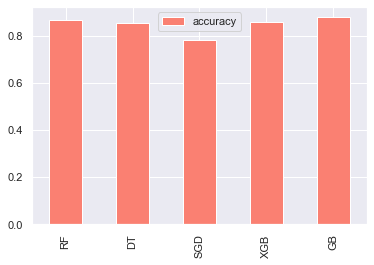

In [36]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color ='salmon');

In [37]:
ideal_model = GradientBoostingRegressor(learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
    min_samples_split=2,
    min_samples_leaf=6,
    min_weight_fraction_leaf=0.0,
    max_depth=2,
    min_impurity_decrease=0.1,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.8,)

In [38]:
ideal_model.fit(train_df,train_label)

print("The best model is:", ideal_model.score(test_df, test_label))

y_preds = ideal_model.predict(test_df)
print("\nThe MSE is:",  mean_squared_error(test_label, y_preds))
print("\nThe MAE is:",  mean_absolute_error(test_label, y_preds))

The best model is: 0.8791611127141001

The MSE is: 18760083.966013353

The MAE is: 2423.742100660437


In [39]:
##Predicting the charges
df = pd.DataFrame({'Actual': test_label, 'Predicted': y_preds})
df

,Actual,Predicted
764,9095.06825,10844.194907
887,5272.17580,6407.959128
890,29330.98315,27820.011184
1293,9301.89355,10113.913303
259,33750.29180,35182.091734
...,...,...
109,47055.53210,45485.011491
575,12222.89830,12769.756948
535,6067.12675,7249.902031
543,63770.42801,45413.389504
